# Creating NBA Shot Charts with Python

## Dependencies

In [1]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
from modules.datasets import NbaScraper
from modules.charts.charts import ShotCharts
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
# get player id
name = "Damian Lillard"
id = NbaScraper.get_json_from_name(name)['id']
print(id)
career = NbaScraper.get_player_career(id)
teams = ['POR']
team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))

seasons = ['2022-23']
shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
shot_data = shot_data[shot_data.GAME_ID == max(shot_data.GAME_ID)]
shot_data.tail()

203081


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
712,Shot Chart Detail,0022200727,517,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,6,38,...,Left Side(L),16-24 ft.,19,-199,-9,1,1,20230125,POR,UTA
713,Shot Chart Detail,0022200727,527,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,5,40,...,Left Side Center(LC),24+ ft.,39,-188,342,1,0,20230125,POR,UTA
714,Shot Chart Detail,0022200727,559,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,3,28,...,Center(C),Less Than 8 ft.,1,15,-10,1,1,20230125,POR,UTA
715,Shot Chart Detail,0022200727,581,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,18,...,Center(C),Less Than 8 ft.,1,-10,0,1,1,20230125,POR,UTA
716,Shot Chart Detail,0022200727,619,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,29,...,Center(C),24+ ft.,28,-78,269,1,0,20230125,POR,UTA


In [3]:
shot_data.sort_values(by=['SHOT_DISTANCE'])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
710,Shot Chart Detail,0022200727,424,203081,Damian Lillard,1610612757,Portland Trail Blazers,3,1,36,...,Center(C),Less Than 8 ft.,0,5,6,1,1,20230125,POR,UTA
692,Shot Chart Detail,0022200727,82,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,5,15,...,Center(C),Less Than 8 ft.,0,9,4,1,1,20230125,POR,UTA
706,Shot Chart Detail,0022200727,384,203081,Damian Lillard,1610612757,Portland Trail Blazers,3,4,23,...,Center(C),Less Than 8 ft.,0,1,-4,1,1,20230125,POR,UTA
705,Shot Chart Detail,0022200727,373,203081,Damian Lillard,1610612757,Portland Trail Blazers,3,5,0,...,Center(C),Less Than 8 ft.,0,6,-3,1,1,20230125,POR,UTA
701,Shot Chart Detail,0022200727,305,203081,Damian Lillard,1610612757,Portland Trail Blazers,3,10,6,...,Center(C),Less Than 8 ft.,0,7,5,1,1,20230125,POR,UTA
688,Shot Chart Detail,0022200727,15,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,10,52,...,Center(C),Less Than 8 ft.,1,-12,6,1,0,20230125,POR,UTA
714,Shot Chart Detail,0022200727,559,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,3,28,...,Center(C),Less Than 8 ft.,1,15,-10,1,1,20230125,POR,UTA
690,Shot Chart Detail,0022200727,38,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,8,14,...,Center(C),Less Than 8 ft.,1,-11,6,1,1,20230125,POR,UTA
703,Shot Chart Detail,0022200727,349,203081,Damian Lillard,1610612757,Portland Trail Blazers,3,6,42,...,Center(C),Less Than 8 ft.,1,-6,13,1,1,20230125,POR,UTA
715,Shot Chart Detail,0022200727,581,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,18,...,Center(C),Less Than 8 ft.,1,-10,0,1,1,20230125,POR,UTA


## Shot Charts

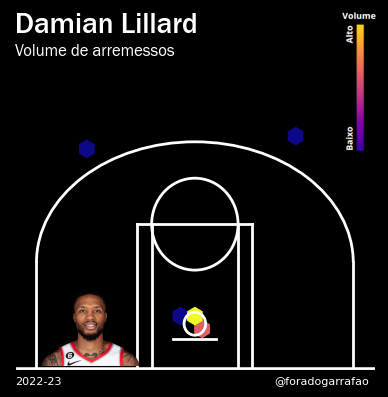

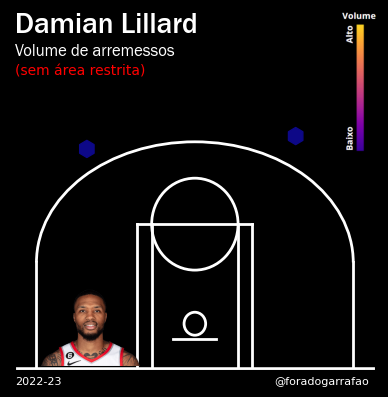

In [5]:
chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
plt.show()

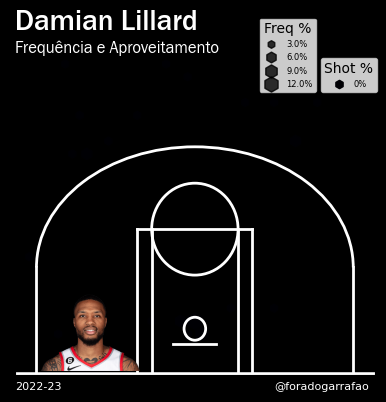

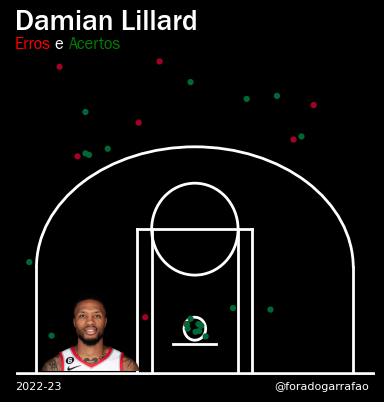

In [6]:
chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
plt.show()